# Nerual Network

A neural network is a parametric model -- just like linear regression and logistic regression, which maps input to output and depends on many parameters.
But it is much more "expressive" than linear models, as it can represent complex non-linear relationships between input and output.

[visualizing single neuron](https://medium.com/analytics-vidhya/neural-network-part1-inside-a-single-neuron-fee5e44f1e)


For the feedforward neural network, also known as the multilayer perceptron (MLP), the model is a composition of linear transformations and non-linear activation functions.


The typical workflow of training a neural network is similar to logistic regression: define the model, define the loss function, and optimize the loss function.

[interative visualization of neural network](https://playground.tensorflow.org/).




Each neuron computes a weighted sum of its inputs, adds a bias, and applies a non-linear activation function. This allows neural networks to model complex, non-linear relationships between inputs and outputs.

### Mathematical expression for a single neuron:

Given input vector $\mathbf{x} \in \mathbb{R}^d$, weights $\mathbf{w} \in \mathbb{R}^d$, and bias $b \in \mathbb{R}$, the output $y$ of a single neuron is:

$$
y = \sigma(\mathbf{w}^T \mathbf{x} + b)
$$

where $\sigma$ is an activation function (e.g., sigmoid, tanh, ReLU).  

In scalar form:  
If $\mathbf{x} = [x_1, x_2, ..., x_d]$, $\mathbf{w} = [w_1, w_2, ..., w_d]$, then

$$
y = \sigma\left(\sum_{j=1}^d w_j x_j + b\right)
$$

That is, each input $x_j$ is multiplied by its weight $w_j$, summed, added to bias $b$, and passed through the activation function.

### Mathematical expression for a neural network:

As an example, we consider a neural network with 2D input, one hidden layer with 3 neurons, and a single output neuron. The architecture can be described as follows:


Let $\mathbf{x} = [x_1, x_2]$. For each hidden neuron:

$$
\begin{aligned}
h_1 &= \sigma(w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_1^{(1)}) \\
h_2 &= \sigma(w_{21}^{(1)} x_1 + w_{22}^{(1)} x_2 + b_2^{(1)}) \\
h_3 &= \sigma(w_{31}^{(1)} x_1 + w_{32}^{(1)} x_2 + b_3^{(1)})
\end{aligned}
$$

where $h_i$ are the outputs of the hidden neurons, $w_{ij}^{(1)}$ are the weights from input neuron $j$ to hidden neuron $i$, and $b_i^{(1)}$ is the bias for hidden neuron $i$, for $i = 1, 2, 3$ and $j = 1, 2$.

The output neuron computes

$$
y = \sigma(w_1^{(2)} h_1 + w_2^{(2)} h_2 + w_3^{(2)} h_3 + b^{(2)})
$$

where $w_j^{(2)}$ are the weights from hidden neuron $j$ to the output, and $b^{(2)}$ is the output bias.

In matrix form, the outputs from the hidden layer is a vector $\mathbf{h} \in \mathbb{R}^3$:

$$
\mathbf{h} = \sigma( W^{(1)} \mathbf{x} + \mathbf{b}^{(1)} )
$$

where $W^{(1)} \in \mathbb{R}^{3 \times 2}$, $\mathbf{b}^{(1)} \in \mathbb{R}^3$, $\mathbf{h} \in \mathbb{R}^3$.

The output layer is:

$$
y = \sigma( W^{(2)} \mathbf{h} + b^{(2)} )
$$

where $W^{(2)} \in \mathbb{R}^{1 \times 3}$, $b^{(2)} \in \mathbb{R}$.

Let $\theta = \{ W^{(1)}, \mathbf{b}^{(1)}, W^{(2)}, b^{(2)} \}$ be all weights and biases. The neural network defines a function $f(\mathbf{x}; \theta)$: it maps input $\mathbf{x}$ to output $y$, and it depends on the parameters $\theta$.

### Optimization problem

For regression, given a dataset $\{ (\mathbf{x}_i, y_i) \}_{i=1}^N$. The goal is to find parameters $\theta$ that minimize the loss (e.g., mean squared error for regression):

$$
\min_{\theta} L(\theta) = \frac{1}{N} \sum_{i=1}^N \big( f(\mathbf{x}_i; \theta),\ y_i \big)^2
$$

where $L$ is the loss function (e.g., cross-entropy for classification, squared error for regression).


### Regularization

As in ridge regression, we can add a regularization term to the loss function to prevent overfitting:

$$
L(\theta) = \frac{1}{N} \sum_{i=1}^N \big( f(\mathbf{x}_i; \theta) - y_i \big)^2 + \lambda R(\theta)
$$

where $R(\theta)$ is a regularization term (e.g., $R(\theta) = ||\theta||^2$ for L2 regularization), and $\lambda$ is a hyperparameter controlling the strength of regularization.

### Training

The problem is typically solved using gradient descent. 

$$\theta \leftarrow \theta - \alpha \nabla_\theta J(\theta)$$

However, in practice, we can not load the entire dataset into memory. 

Instead, we use mini-batch gradient descent, which updates the model using a small random subset of the data (a mini-batch) at each iteration.


In the following, we will compare the performance of a neural network and a logistic regression model on the hand written digit classification task.

In [6]:
import numpy as np
import torch
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

# Transform from torch tensor to numpy array
to_numpy_transform = transforms.Compose([
    transforms.ToTensor(),
    lambda x: x.numpy()
])

# Load the MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=to_numpy_transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=to_numpy_transform)

# concatenate the train and test sets, shape = (batch,28,28)
X = np.concatenate([mnist_train.data, mnist_test.data], axis=0)
y = np.concatenate([mnist_train.targets, mnist_test.targets], axis=0)

# Normalize the data
X = X.reshape(-1, 784)  #shape = (batch, 784)
X = X / 255.0  # normalize to [0,1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)  # Approximately 10k test samples


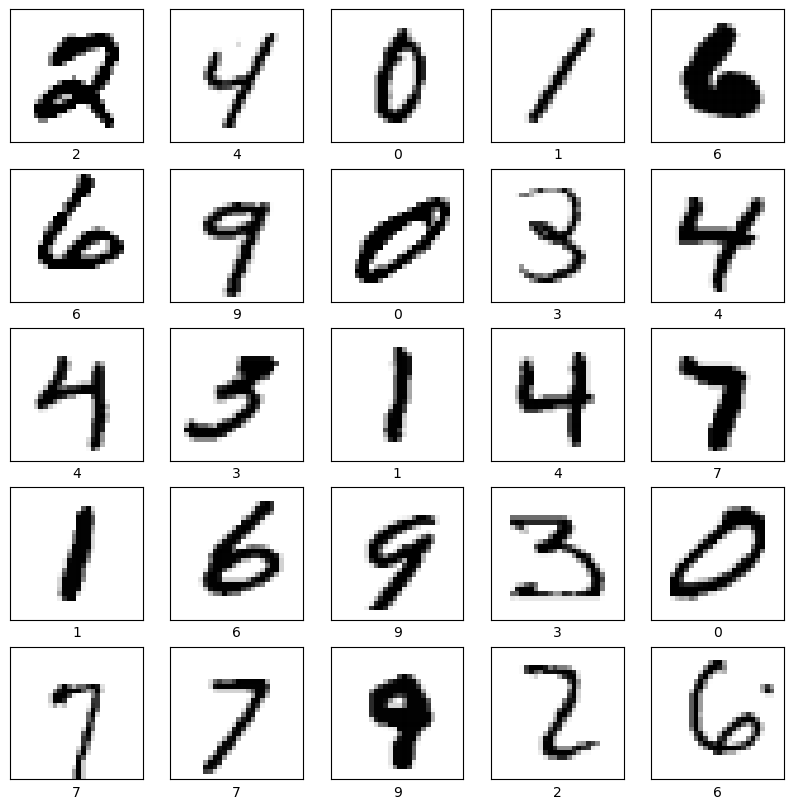

In [7]:
# visualize example images
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # black background
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')


Logistic Regression Accuracy: 92.00%


In [10]:
from torch.utils.data import TensorDataset, DataLoader

# Convert arrays back to torch tensors for training in PyTorch
tensor_X_train = torch.Tensor(X_train).reshape(-1, 1, 28, 28)  # Reshape to (batch, channel, height, width)
tensor_y_train = torch.Tensor(y_train).to(torch.int64)
tensor_X_test = torch.Tensor(X_test).reshape(-1, 1, 28, 28)
tensor_y_test = torch.Tensor(y_test).to(torch.int64)

# Create TensorDatasets
train_dataset = TensorDataset(tensor_X_train, tensor_y_train)
test_dataset = TensorDataset(tensor_X_test, tensor_y_test)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score

# define model
class NeuralNet(nn.Module):
    def __init__(self, width=64):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.width = width
        self.layers = nn.Sequential(
            nn.Linear(28*28, self.width),
            nn.Tanh(),
            nn.Linear(self.width, self.width),
            nn.Tanh(),
            nn.Linear(self.width, self.width),
            nn.Tanh(),
            nn.Linear(self.width, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers(x)
        prob = nn.functional.softmax(logits, dim=1)
        return prob

model = NeuralNet()

# Loss and Optimizer
bceloss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

    

# Compute accuracy
def evaluate(loader):
    model.eval()
    total, correct = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images, labels
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Run training
n_epoch = 10
for epoch in range(n_epoch): 
    model.train()
    for images, labels in train_loader:
        images, labels = images, labels
        outputs = model(images)
        loss = bceloss(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = evaluate(test_loader)
    print(f'Epoch {epoch+1}, loss: {loss.item():.4f}, test accuracy: {accuracy:.2f}%')

# Evaluate the final accuracy
final_accuracy = evaluate(test_loader)
print(f'Test Accuracy: {final_accuracy:.2f}%')


Epoch 1, loss: 1.5925, test accuracy: 92.60%
Epoch 2, loss: 1.5329, test accuracy: 94.49%
Epoch 3, loss: 1.5575, test accuracy: 95.32%
Epoch 4, loss: 1.5678, test accuracy: 95.59%
Epoch 5, loss: 1.5258, test accuracy: 95.68%
Epoch 6, loss: 1.4619, test accuracy: 96.00%
Epoch 7, loss: 1.4678, test accuracy: 95.98%
Epoch 8, loss: 1.4881, test accuracy: 96.30%
Epoch 9, loss: 1.4665, test accuracy: 96.67%
Epoch 10, loss: 1.4612, test accuracy: 96.41%
Test Accuracy: 96.41%


## Convolutional Neural Network (CNN)


[Convolutional Neural Network](https://poloclub.github.io/cnn-explainer/)

In [14]:
# Define a smaller and efficient CNN for MNIST
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Use fewer filters and a single convolutional block
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1),  # 8 filters instead of 16
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),  # 16 filters instead of 32
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(16 * 7 * 7, 32),  # Smaller fully connected layer
            nn.ReLU(),
            nn.Linear(32, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        logits = self.fc_layers(x)
        prob = nn.functional.softmax(logits, dim=1)
        return prob

cnn_model = SimpleCNN()
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

def evaluate_cnn(loader):
    cnn_model.eval()
    total, correct = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = cnn_model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Train the CNN
n_epoch = 5
for epoch in range(n_epoch):
    cnn_model.train()
    for images, labels in train_loader:
        outputs = cnn_model(images)
        loss = cnn_criterion(outputs, labels)
        cnn_optimizer.zero_grad()
        loss.backward()
        cnn_optimizer.step()
    accuracy = evaluate_cnn(test_loader)
    print(f'CNN Epoch {epoch+1}, loss: {loss.item():.4f}, test accuracy: {accuracy:.2f}%')

cnn_final_accuracy = evaluate_cnn(test_loader)
print(f'CNN Test Accuracy: {cnn_final_accuracy:.2f}%')

CNN Epoch 1, loss: 1.5538, test accuracy: 85.76%
CNN Epoch 2, loss: 1.5838, test accuracy: 95.99%
CNN Epoch 2, loss: 1.5838, test accuracy: 95.99%
CNN Epoch 3, loss: 1.4915, test accuracy: 96.51%
CNN Epoch 3, loss: 1.4915, test accuracy: 96.51%
CNN Epoch 4, loss: 1.4614, test accuracy: 97.12%
CNN Epoch 4, loss: 1.4614, test accuracy: 97.12%
CNN Epoch 5, loss: 1.5010, test accuracy: 97.32%
CNN Epoch 5, loss: 1.5010, test accuracy: 97.32%
CNN Test Accuracy: 97.32%
CNN Test Accuracy: 97.32%
